# Face Detection with Haar Cascades

**Note: This is face *detection* NOT face *recognition*. I am only detecting if a face is in an image, not who the face actually is. That requires deep learning **

In [15]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline

## Images

In [16]:
nadia = cv2.imread("C:/Users/jamali's/Desktop/DATA/Nadia_Murad.jpg",0)
denis = cv2.imread("C:/Users/jamali's/Desktop/DATA/Denis_Mukwege.jpg",0)
solvay = cv2.imread("C:/Users/jamali's/Desktop/DATA/solvay_conference.jpg",0)

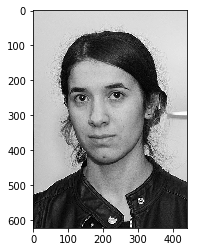

In [17]:
plt.imshow(nadia,cmap='gray')

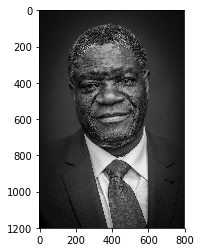

In [18]:
plt.imshow(denis,cmap='gray')

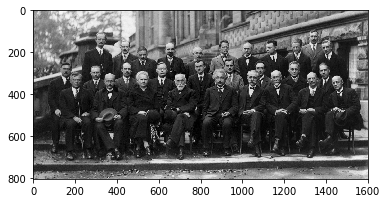

In [19]:
plt.imshow(solvay,cmap='gray')

## Cascade Files

OpenCV comes with these pre-trained cascade files, we've relocated the .xml files for you in our own DATA folder.

## Face Detection

In [20]:
face_cascade = cv2.CascadeClassifier("C:/Users/jamali's/Desktop/DATA/haarcascades/haarcascade_frontalface_default.xml")

In [21]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    
    return face_img
    

In [22]:
result = detect_face(denis)

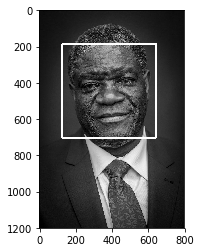

In [23]:
plt.imshow(result,cmap='gray')

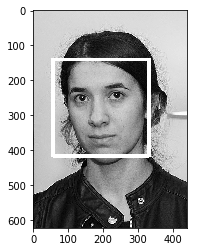

In [24]:
result = detect_face(nadia)
plt.imshow(result,cmap='gray')

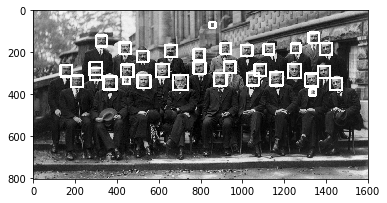

In [25]:
# Gets errors!
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

In [26]:
def adj_detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.2, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

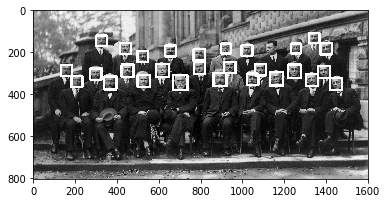

In [27]:
# Doesn't detect the side face.
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

## Eye Cascade File

In [28]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

In [29]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

In [30]:
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

error: C:\projects\opencv-python\opencv\modules\objdetect\src\cascadedetect.cpp:1698: error: (-215) !empty() in function cv::CascadeClassifier::detectMultiScale


In [ ]:
eyes = eye_cascade.detectMultiScale(denis) 

In [ ]:
# White around the pupils is not distinct enough to detect Denis' eyes here!
result = detect_eyes(denis)
plt.imshow(result,cmap='gray')

Take a look at the other cascade files, you'll be using them in your upcoming project exercise!

## Conjunction with Video

In [31]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()